<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


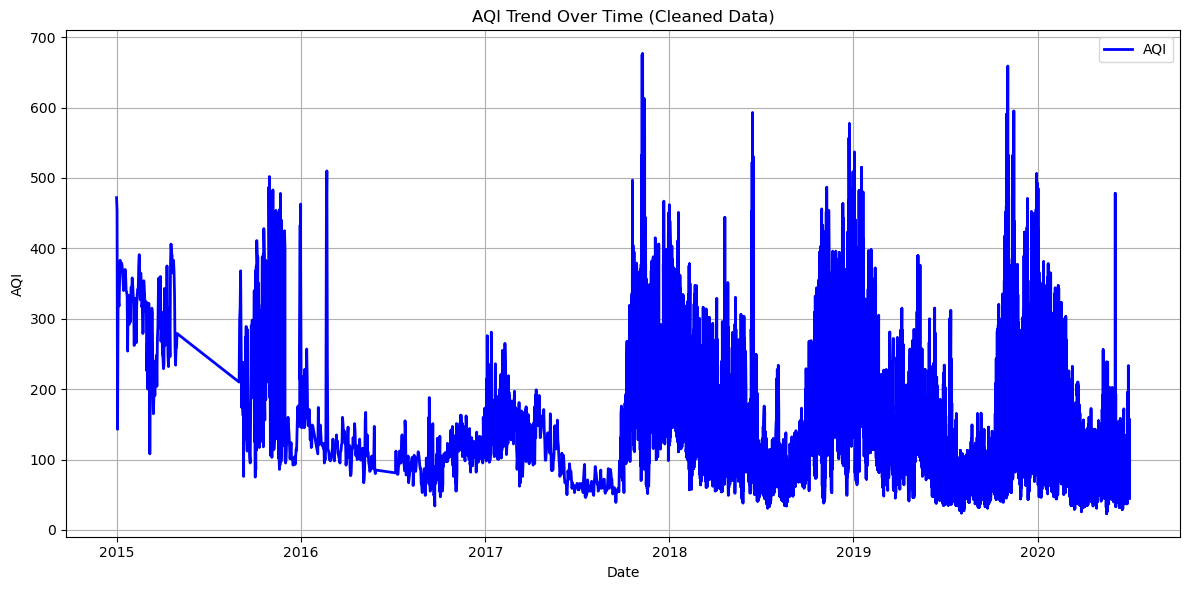

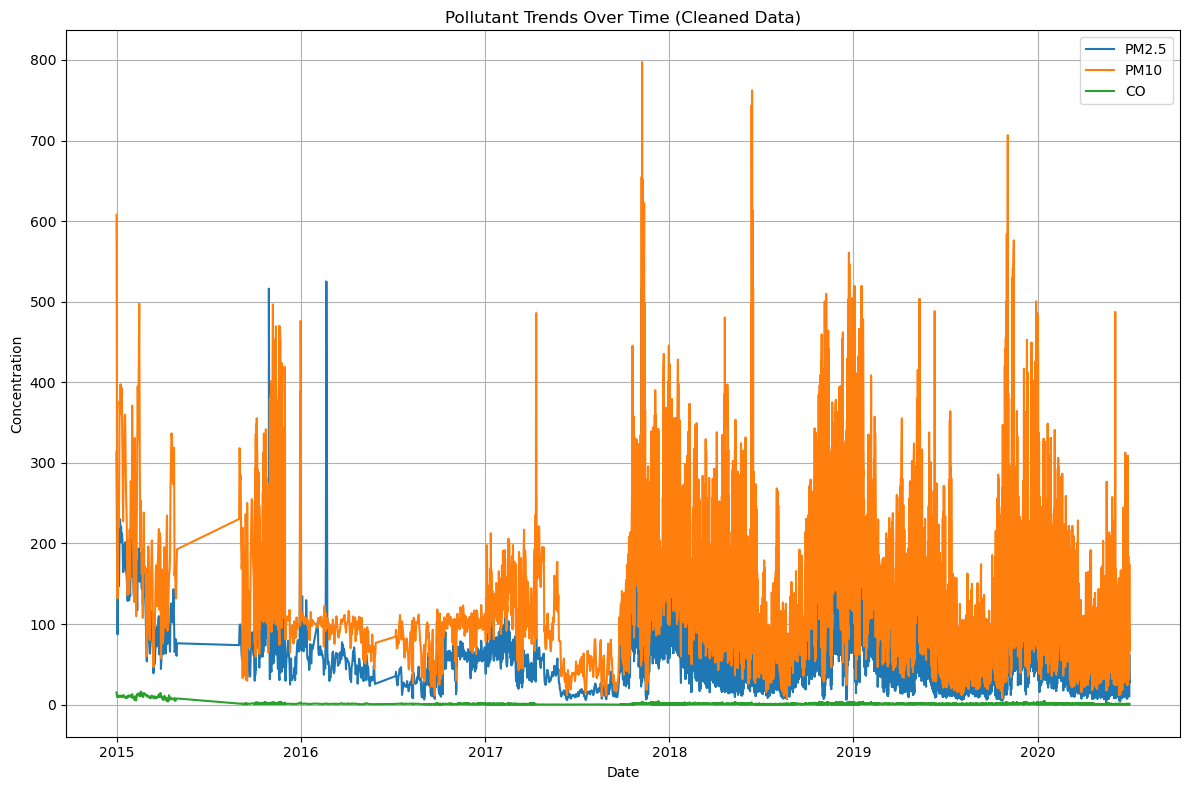

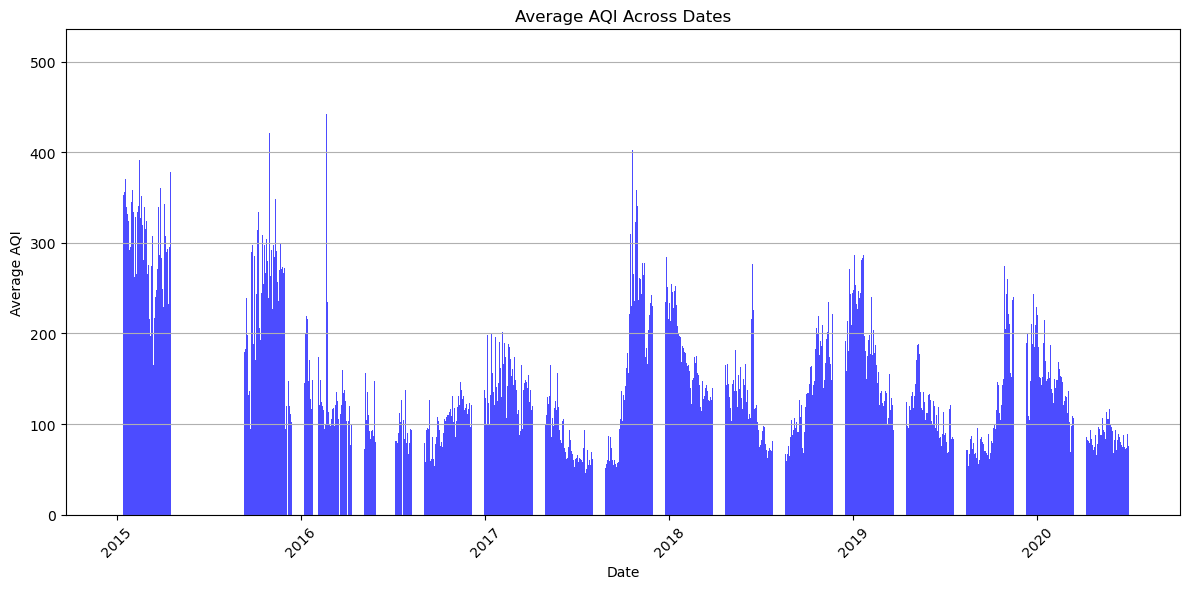

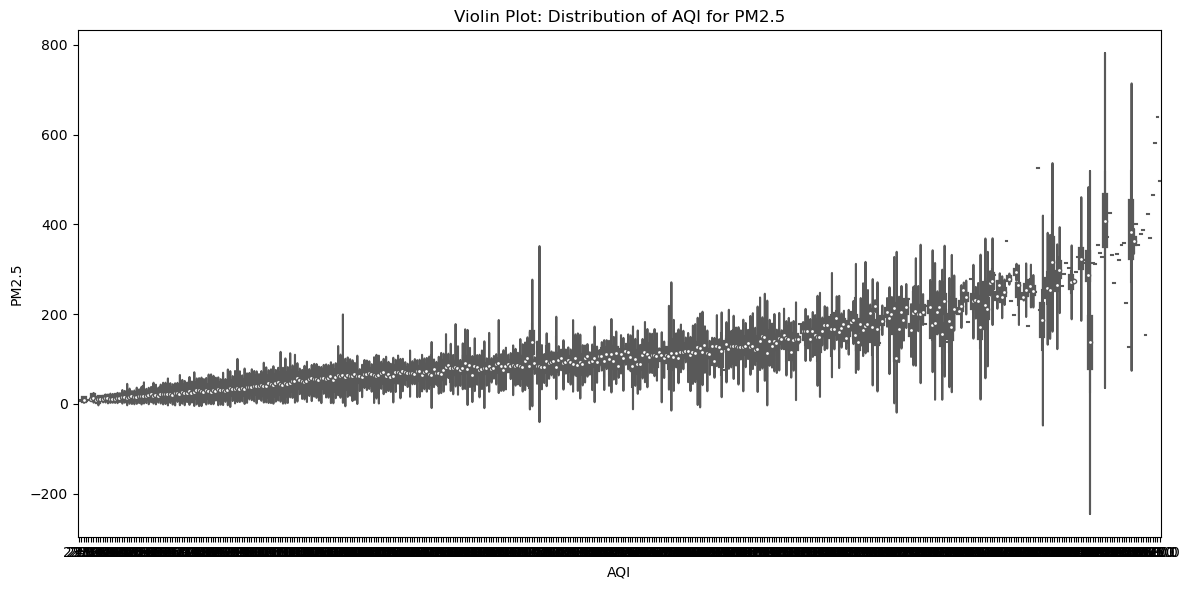

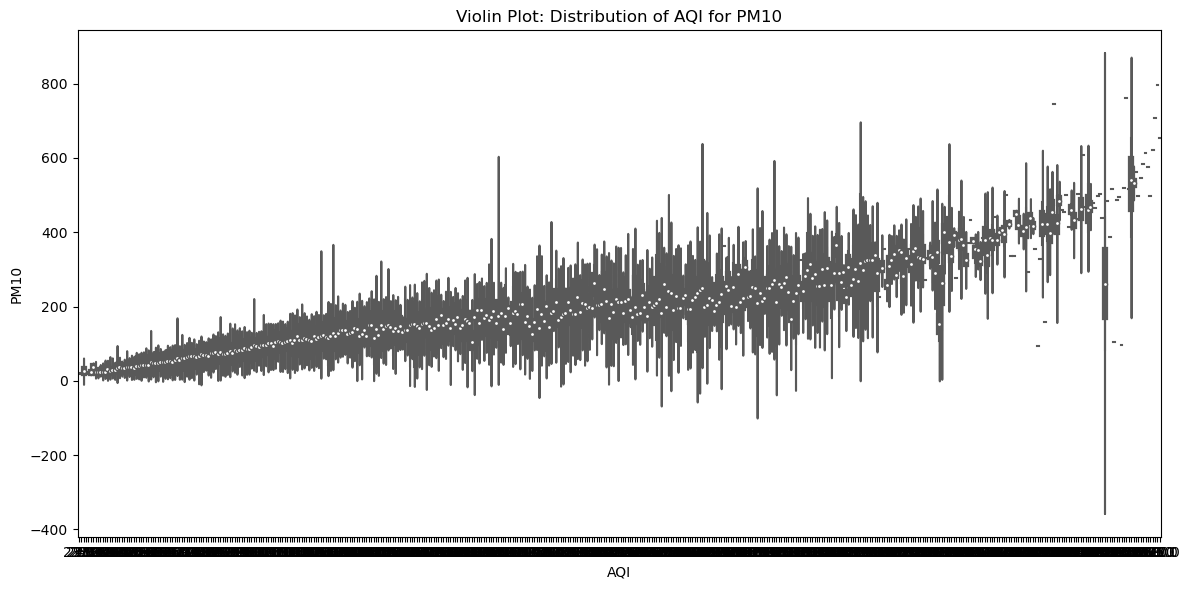

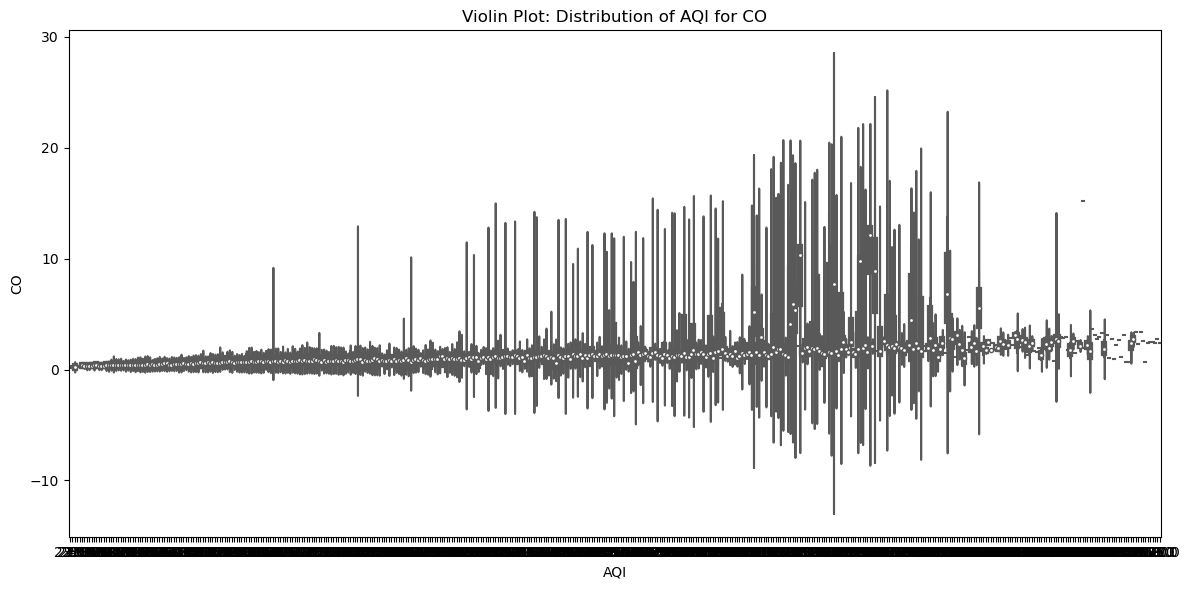

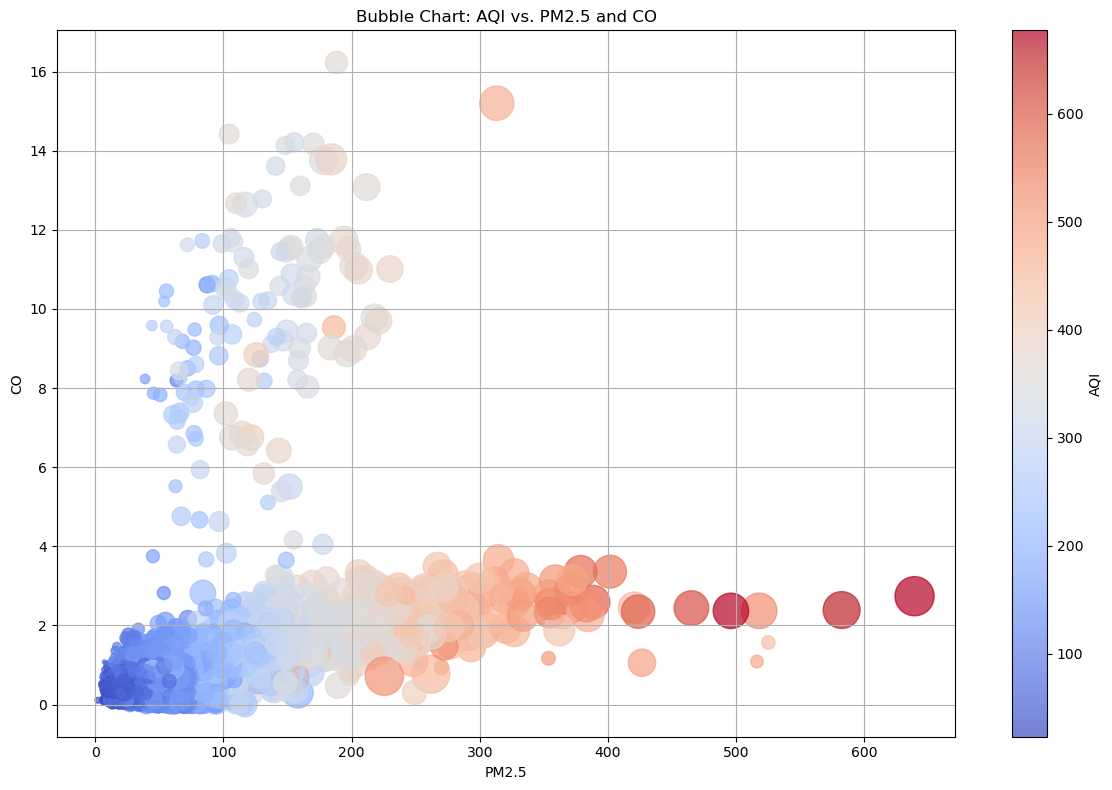

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("AirQuality.csv")
data

data.info()
data.isnull().sum()

data.dropna(inplace=True)
cleaned_data = data.dropna()

cleaned_data
cleaned_data.isnull().sum()



# Convert the 'Date' column to a datetime format for proper time series plotting
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Sort the DataFrame by the 'Date' column (optional but recommended for time series)
cleaned_data.sort_values(by='Date', inplace=True)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['AQI'], label='AQI', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time (Cleaned Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Sort the DataFrame by the 'Date' column (optional but recommended for time series)
cleaned_data.sort_values(by='Date', inplace=True)

# Define the pollutants you want to plot
pollutants = ['PM2.5', 'PM10', 'CO']

# Create separate line plots for each pollutant
plt.figure(figsize=(12, 8))

for pollutant in pollutants:
    plt.plot(cleaned_data['Date'], cleaned_data[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Pollutant Trends Over Time (Cleaned Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plots
plt.show()


cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Group the data by 'Date' and calculate the mean AQI for each date
aqi_by_date = cleaned_data.groupby('Date')['AQI'].mean().reset_index()

# Create a bar plot to compare AQI values across dates
plt.figure(figsize=(12, 6))
plt.bar(aqi_by_date['Date'], aqi_by_date['AQI'], color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.title('Average AQI Across Dates')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()





pollutants = ['PM2.5', 'PM10', 'CO']


# Create violin plots for the same analysis (if desired)
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='PM2.5', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('PM2.5')
plt.title('Violin Plot: Distribution of AQI for PM2.5')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='PM10', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('PM10')
plt.title('Violin Plot: Distribution of AQI for PM10')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='CO', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('CO')
plt.title('Violin Plot: Distribution of AQI for CO')
plt.tight_layout()
plt.show()




# Define variables for the bubble chart
x = cleaned_data['PM2.5']
y = cleaned_data['CO']
bubble_size = cleaned_data['PM10']  # Represent 'PM10' using bubble size
aqi_values = cleaned_data['AQI']

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=bubble_size, c=aqi_values, cmap='coolwarm', alpha=0.7)
plt.xlabel('PM2.5')
plt.ylabel('CO')
plt.title('Bubble Chart: AQI vs. PM2.5 and CO')
plt.colorbar(label='AQI')  # Add colorbar to show AQI values
plt.grid(True)
plt.tight_layout()
plt.show()